# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [37]:
# Code Here
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [16]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [26]:
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [62]:
# Multiple Linear Regression
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

fitted_pipeline = lr_pipeline.fit(X_train, y_train)

lr_mse_train = mean_squared_error(y_true = y_train, y_pred = fitted_pipeline.predict(X_train))
lr_mse_test = mean_squared_error(y_true = y_test, y_pred = fitted_pipeline.predict(X_test))

print(f"MSE Train: {lr_mse_train} \nMSE Test: {lr_mse_test}")

mses = pd.DataFrame(columns=["Complexity", "MSE", "Train/Test"])
mses.at[0, "Complexity"] = len(fitted_pipeline.named_steps["linear_regression"].coef_)
mses.at[1, "Complexity"] = len(fitted_pipeline.named_steps["linear_regression"].coef_)
mses.at[0, "MSE"] = lr_mse_train
mses.at[1, "MSE"] = lr_mse_test
mses.at[0, "Train/Test"] = 0
mses.at[1, "Train/Test"] = 1

MSE Train: 0.573194452588965 
MSE Test: 0.701644732089704


In [65]:
# kNN Model 1 (k = 5)
knn_pipeline_1 = Pipeline(
    [
        ("preprocessing", ct),
        ("knn", KNeighborsRegressor(n_neighbors=5))
    ]
)

fitted_pipeline = knn_pipeline_1.fit(X_train, y_train)

knn1_mse_train = mean_squared_error(y_true = y_train, y_pred = fitted_pipeline.predict(X_train))
knn1_mse_test = mean_squared_error(y_true = y_test, y_pred = fitted_pipeline.predict(X_test))

print(f"MSE Train: {knn1_mse_train} \nMSE Test: {knn1_mse_test}")

mses.at[2, "Complexity"] = 5
mses.at[3, "Complexity"] = 5
mses.at[2, "MSE"] = knn1_mse_train
mses.at[3, "MSE"] = knn1_mse_test
mses.at[2, "Train/Test"] = 0
mses.at[3, "Train/Test"] = 1

MSE Train: 0.45762730923694783 
MSE Test: 0.6333761904761904


In [66]:
# kNN Model 2 (k = 25)
knn_pipeline_2 = Pipeline(
    [
        ("preprocessing", ct),
        ("knn", KNeighborsRegressor(n_neighbors=25))
    ]
)

fitted_pipeline = knn_pipeline_2.fit(X_train, y_train)

knn2_mse_train = mean_squared_error(y_true = y_train, y_pred = fitted_pipeline.predict(X_train))
knn2_mse_test = mean_squared_error(y_true = y_test, y_pred = fitted_pipeline.predict(X_test))

print(f"MSE Train: {knn2_mse_train} \nMSE Test: {knn2_mse_test}")

mses.at[4, "Complexity"] = 25
mses.at[5, "Complexity"] = 25
mses.at[4, "MSE"] = knn2_mse_train
mses.at[5, "MSE"] = knn2_mse_test
mses.at[4, "Train/Test"] = 0
mses.at[5, "Train/Test"] = 1

MSE Train: 0.621260080321285 
MSE Test: 0.6761792380952384


In [77]:
# Decision Tree
dtree_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("dtree", DecisionTreeRegressor(ccp_alpha=.1))
    ]
)

fitted_pipeline = dtree_pipeline.fit(X_train, y_train)

dtree_mse_train = mean_squared_error(y_true = y_train, y_pred = fitted_pipeline.predict(X_train))
dtree_mse_test = mean_squared_error(y_true = y_test, y_pred = fitted_pipeline.predict(X_test))

print(f"MSE Train: {dtree_mse_train} \nMSE Test: {dtree_mse_test}")

mses.at[6, "Complexity"] = fitted_pipeline.named_steps["dtree"].get_depth()
mses.at[7, "Complexity"] = fitted_pipeline.named_steps["dtree"].get_depth()
mses.at[6, "MSE"] = knn2_mse_train
mses.at[7, "MSE"] = knn2_mse_test
mses.at[6, "Train/Test"] = 0
mses.at[7, "Train/Test"] = 1

MSE Train: 0.6775782638159474 
MSE Test: 0.7232405780099097


In [108]:
mses["MSE"] = mses["MSE"].astype(float)

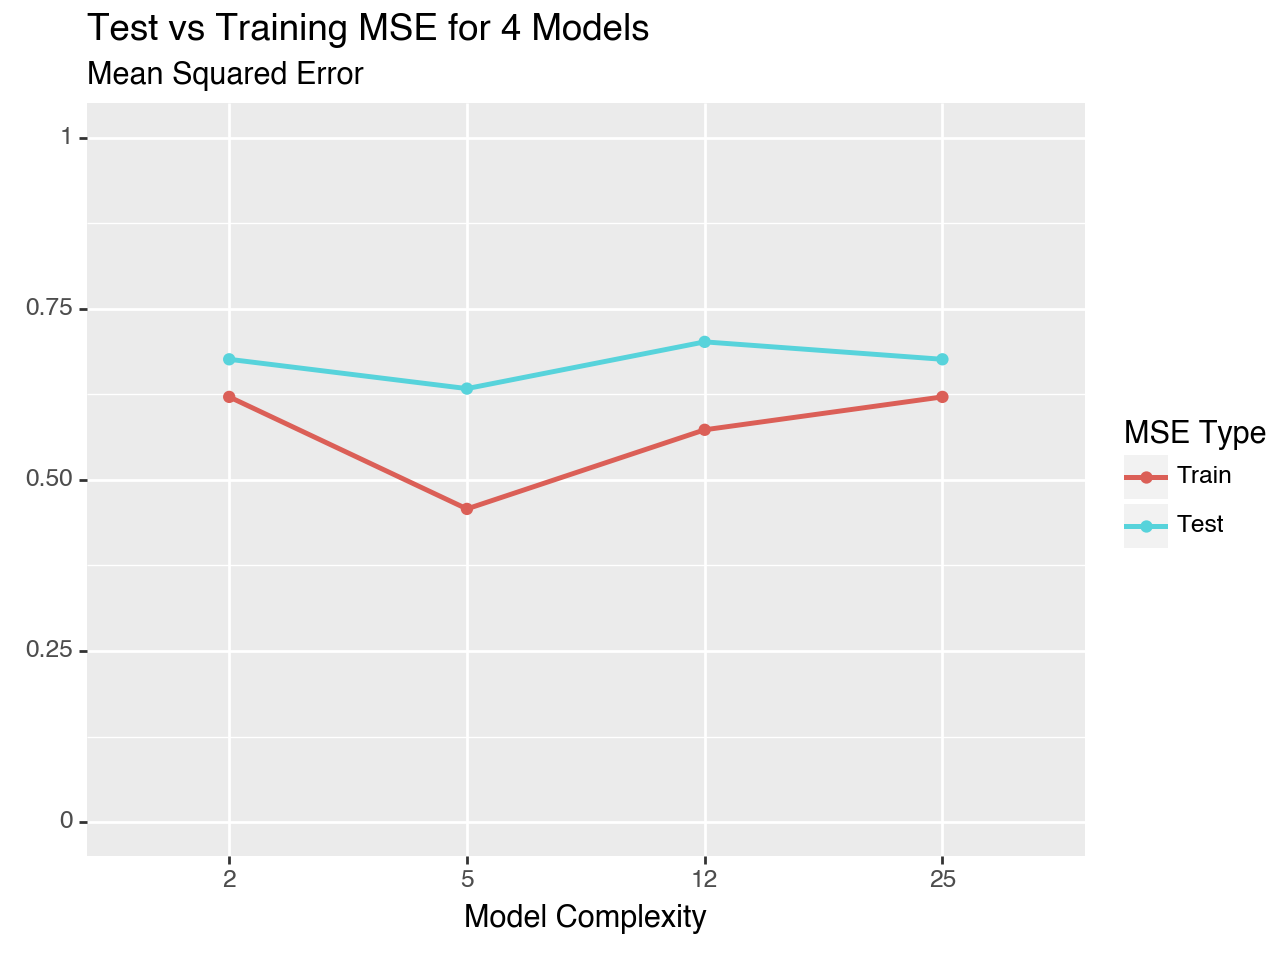

<Figure Size: (640 x 480)>

In [112]:
from plotnine import ggplot, aes, labs, geom_point, geom_smooth, scale_color_discrete, scale_y_continuous
(ggplot(mses, aes(x = "Complexity", y = "MSE", color = "Train/Test", group = "Train/Test")) + 
    geom_point() +
    geom_smooth(method = "lowess", se=False) +
    scale_color_discrete(labels = ["Train", "Test"]) +
    scale_y_continuous(limits = [0, 1], breaks = [0, .25, .5, .75, 1]) + 
    labs(
        x = "Model Complexity",
        y = "",
        subtitle = "Mean Squared Error",
        title = "Test vs Training MSE for 4 Models",
        color = "MSE Type"
    ))